# Predict stock sentiment using Natural Language Processing

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk


In [2]:
# Load the data from the csv file
data = pd.read_csv("stock_data.csv")
data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


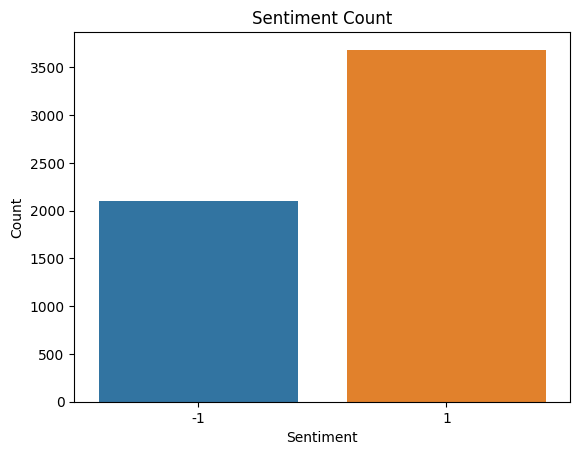

In [3]:
# Plot the Sentiment count for -1 and 1
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [4]:
data['Sentiment'].value_counts(normalize=True)

 1    0.636332
-1    0.363668
Name: Sentiment, dtype: float64

In [5]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

# Print the shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4632,)
(1159,)
(4632,)
(1159,)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(4632, 8807)

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer

# Create a TfidfTransformer object
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(4632, 8807)

In [8]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [9]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()),])
text_clf = text_clf.fit(X_train, y_train)

In [10]:
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

0.7299396031061259

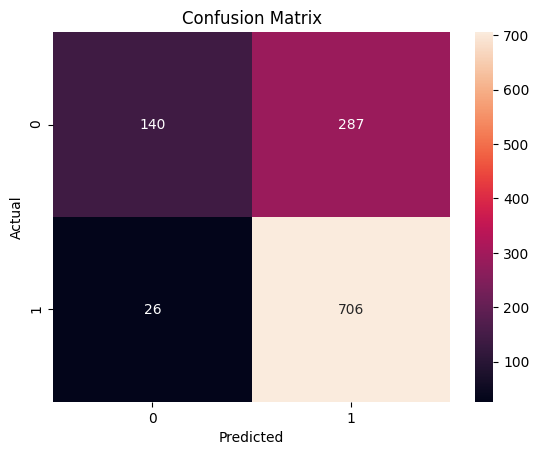

In [11]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
conf_metr = confusion_matrix(y_test, predicted)
sns.heatmap(conf_metr, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [12]:
# Get the classification report
from sklearn.metrics import classification_report
from sklearn import metrics


print(metrics.classification_report(y_test,predicted))
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print("F1 Score:",metrics.f1_score(y_test, predicted))


              precision    recall  f1-score   support

          -1       0.84      0.33      0.47       427
           1       0.71      0.96      0.82       732

    accuracy                           0.73      1159
   macro avg       0.78      0.65      0.65      1159
weighted avg       0.76      0.73      0.69      1159

Accuracy: 0.7299396031061259
Recall/Sensitivity/True Positive Rate: 0.9644808743169399
Precision: 0.7109768378650554
F1 Score: 0.8185507246376811


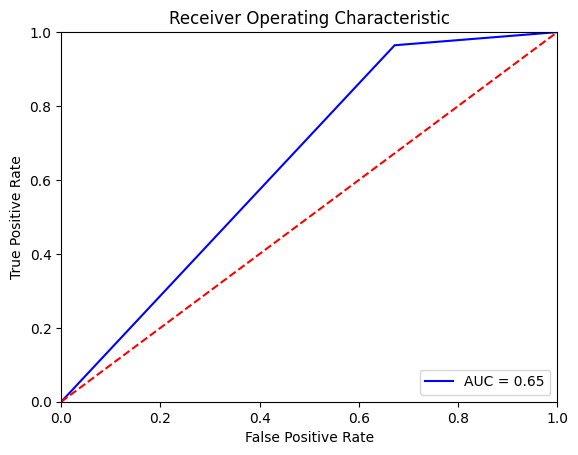

In [13]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [14]:
# Get the K-S statistic
from scipy.stats import ks_2samp
ks_2samp(y_test, predicted)


KstestResult(statistic=0.22519413287316653, pvalue=3.682417003450075e-26)